# Handling Posterior Distributions of $\alpha_{\rm MLT}$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

To estimate the predicted value of $\alpha_{\rm MLT}$, do we take the mean, median, or mode? Or does it matter which we take?

We'll adopt posterior distributions from the MCMC run where we held $Y_i$ fixed and permitted $\alpha_{\rm MLT}$ to vary. 

In [2]:
means = np.genfromtxt('data/run08_mean_props.txt')
medians = np.genfromtxt('data/run08_median_props.txt')
modes = np.genfromtxt('data/run08_mle_props.txt')

Start by plotting them directly against one another.

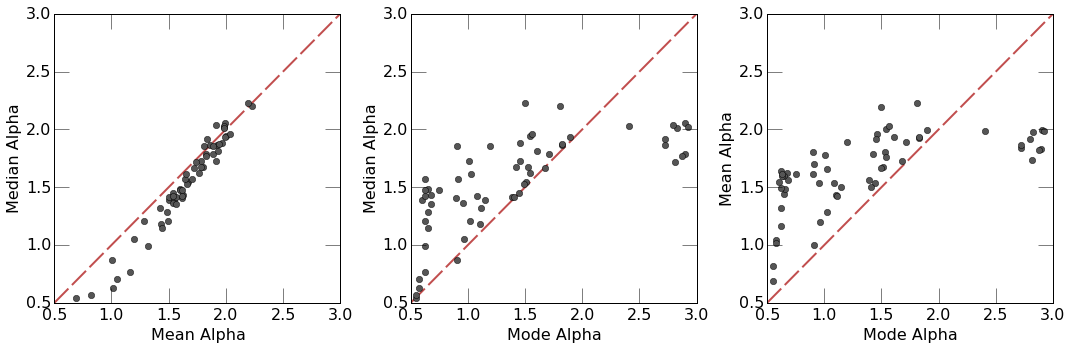

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15., 5.))

for axis in ax:
    axis.tick_params(which='major', axis='both', labelsize=16., length=15.)

# Median vs mean
ax[0].set_xlabel('Mean Alpha', fontsize=16.)
ax[0].set_ylabel('Median Alpha', fontsize=16.)
ax[0].plot([0.5, 3.0], [0.5, 3.0], dashes=(20., 5.), lw=2, c="#b22222", alpha=0.8)
ax[0].plot(means[:, 5], medians[:, 5], 'o', c="#555555")

# Median vs mode
ax[1].set_xlabel('Mode Alpha', fontsize=16.)
ax[1].set_ylabel('Median Alpha', fontsize=16.)
ax[1].plot([0.5, 3.0], [0.5, 3.0], dashes=(20., 5.), lw=2, c="#b22222", alpha=0.8)
ax[1].plot(modes[:, 5], medians[:, 5], 'o', c="#555555")

# Mean vs Mode
ax[2].set_xlabel('Mode Alpha', fontsize=16.)
ax[2].set_ylabel('Mean Alpha', fontsize=16.)
ax[2].plot([0.5, 3.0], [0.5, 3.0], dashes=(20., 5.), lw=2, c="#b22222", alpha=0.8)
ax[2].plot(modes[:, 5], means[:, 5], 'o', c="#555555")

fig.tight_layout()

Mean and median values trace each other well. However, mean values tend to be larger than median values, with the difference increasing toward lower values of $\alpha$. There is a clear tendency for modal values to be smaller than both mean and median values, suggesting that the posterior distributions are typically skewed toward lower values. One notices that there is a population of stars whose modal values are around $\alpha = 3.0$. Individually checking the posterior distributions confirms that many of these have fairly flat distributions with local maximums at low and high values of $\alpha$. 

---

### Kernel Density Estimation

In [4]:
from scipy.stats import gaussian_kde

We'll start with our solar data set to see if this will work.

In [5]:
samples = np.genfromtxt('data/Sun_W0300_N0600_B0000.dat')

Reshape to extract only the final 20 steps from each walker.

In [6]:
chains = samples.reshape(300, -1, 9)
samples = chains[:, -20:, :].reshape(-1, 9)

Quickly, here is what the posterior distribution for $\alpha$ looks like.

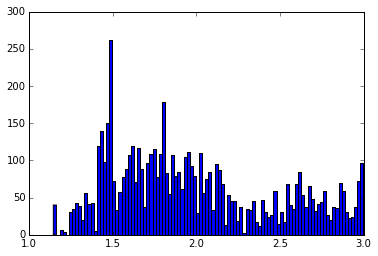

In [7]:
histogram = plt.hist(samples[:, 5], bins=100)

There is a notable peak around $\alpha = 1.5$, which we commented on in our note on the solar runs. Now attempt a KDE.

In [8]:
kde = gaussian_kde(samples[:, 5])

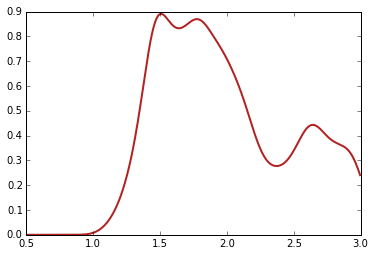

In [9]:
alphas = np.arange(0.5, 3.0, 0.005)
plt.plot(alphas, kde(alphas), '-', lw=2, c='#b22222')

This turns out to be precisely the technique used to compute "modal" values, which were assumed to be the peak of the probability distribution function. Note that, by taking only some of the final samples, we extract a much smoother distribution. 

What if we try only the final iteration? That should, in principle, be representative of the target distribution.

In [10]:
samples = chains[:, -10, :].reshape(-1, 9)

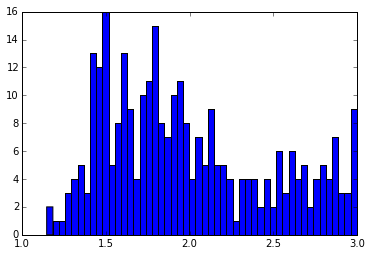

In [11]:
histogram = plt.hist(samples[:, 5], bins=50)

In [12]:
kde = gaussian_kde(samples[:, 5])

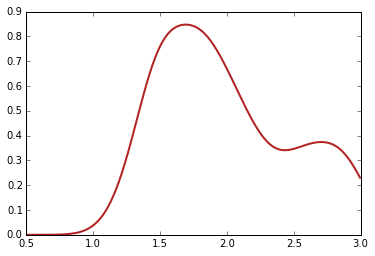

In [13]:
plt.plot(alphas, kde(alphas), '-', lw=2, c='#b22222')

When one does this, we find that the distribution is considerably more smooth with a peak value lying around $\alpha = 1.75$, quite close to the true value. 

Choosing other snapshots of the run toward the end of the simluations should reveal similar distributions. Do they?

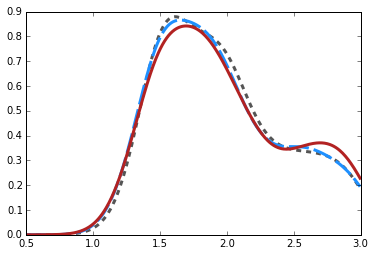

In [14]:
sample100 = chains[:, -100, :].reshape(-1, 9)
kde = gaussian_kde(sample100[:, 5], bw_method='silverman')
max100 = alphas[np.argmax(kde(alphas))]
plt.plot(alphas, kde(alphas), dashes=(5., 5.), lw=3, c='#555555')

sample050 = chains[:, -50, :].reshape(-1, 9)
kde = gaussian_kde(sample050[:, 5], bw_method='silverman')
max050 = alphas[np.argmax(kde(alphas))]
plt.plot(alphas, kde(alphas), dashes=(20., 5.), lw=3, c='#1e90ff')

sample010 = chains[:, -10, :].reshape(-1, 9)
kde = gaussian_kde(sample010[:, 5], bw_method='silverman')
max010 = alphas[np.argmax(kde(alphas))]
plt.plot(alphas, kde(alphas), '-', lw=3, c='#b22222')

In [15]:
max100, max050, max010

(1.6150000000000011, 1.6550000000000011, 1.6950000000000012)

There does appear to be a constant shift of the distribution toward higher values of $\alpha$ as the simluation progresses. This could be used to suggest that we should continue to run the simluation longer, but shifts in the peak of the distributions are not significant compared to uncertainties.

In [16]:
peaks = np.array([1.70])
for i in range(1, 201, 20):
    samples = chains[:, -i,:].reshape(-1, 9)
    kde = gaussian_kde(samples[:, 5], bw_method='silverman')
    peaks = np.append(peaks, alphas[np.argmax(kde(alphas))])

In [17]:
np.median(peaks)

1.660000000000001

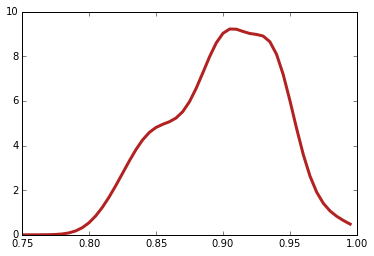

In [18]:
masses = np.arange(0.75, 1.0, 0.005)
kde = gaussian_kde(sample010[:, 0], bw_method='silverman')
max010 = masses[np.argmax(kde(masses))]
plt.plot(masses, kde(masses), '-', lw=3, c='#b22222')

In [19]:
max010

0.90500000000000014

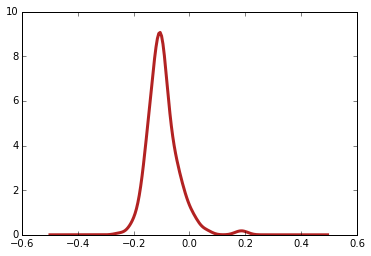

In [20]:
params = np.arange(-0.5, 0.5, 0.005)
kde = gaussian_kde(sample010[:, 1], bw_method='silverman')
max010 = params[np.argmax(kde(params))]
plt.plot(params, kde(params), '-', lw=3, c='#b22222')

In [21]:
max010

-0.10499999999999965

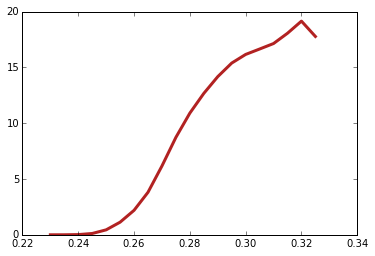

In [22]:
params = np.arange(0.23, 0.33, 0.005)
kde = gaussian_kde(sample010[:, 2], bw_method='silverman')
max010 = params[np.argmax(kde(params))]
plt.plot(params, kde(params), '-', lw=3, c='#b22222')

In [23]:
max010

0.32000000000000006

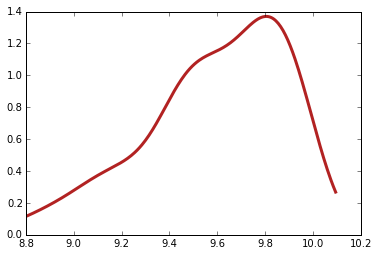

In [24]:
params = np.arange(8.8, 10.1, 0.005)
kde = gaussian_kde(sample010[:, 3], bw_method='silverman')
max010 = params[np.argmax(kde(params))]
plt.plot(params, kde(params), '-', lw=3, c='#b22222')

In [25]:
10**max010/1.0e9

6.3826348619078068